In [1]:
# import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
# load the wine quality data
wine_quality = pd.read_csv('winequality.csv')
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine_quality.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


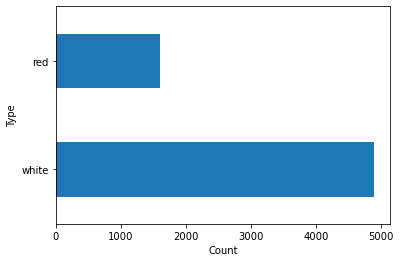

In [8]:
# plotting a graph to see types
wine_quality['type'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

In [9]:
wine_quality = wine_quality.dropna()

<AxesSubplot:>

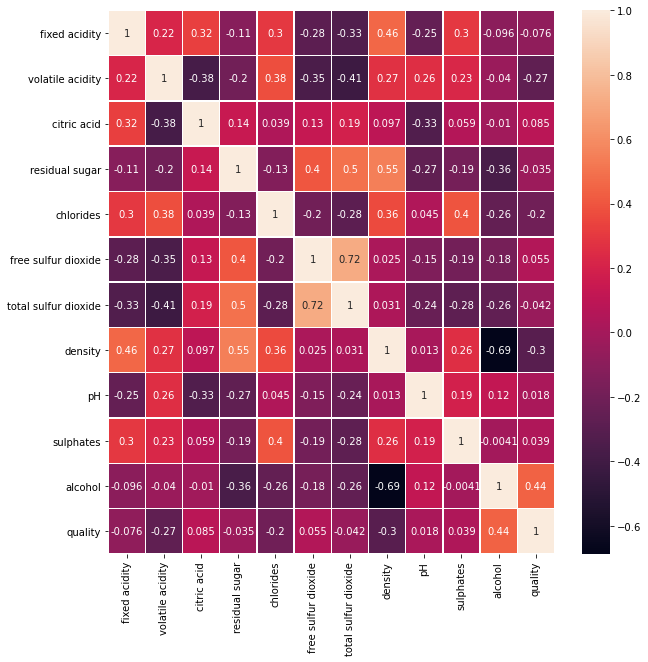

In [10]:
corrMatrix = wine_quality.corr()
plt.figure(figsize=(10, 10))
sn.heatmap(corrMatrix, annot=True, linewidths=0.5)

In [8]:
# get encoding on categorical variables
wine_quality = pd.get_dummies(wine_quality, columns=["type"], prefix=["type"])
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [9]:
# perform scaling on the data
X = wine_quality.drop('quality', axis = 1)
Y = wine_quality['quality']
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=wine_quality.drop("quality",axis = 1).columns)

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)
X_train = X_train.values
X_test = X_test.values

In [12]:
from keras.models import Sequential
from keras.layers import *

# define the model
model = Sequential([
  Dense(512, input_dim=13, activation='relu'),
  #Dropout(0.5),
  Dense(256, activation='relu'),
  #Dropout(0.5),
  Dense(32, activation='relu'),
  Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    shuffle=True,
    verbose=2,
)

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

Using TensorFlow backend.


Train on 4652 samples, validate on 1164 samples
Epoch 1/100
 - 1s - loss: 3.0440 - val_loss: 0.5812
Epoch 2/100
 - 1s - loss: 0.6069 - val_loss: 0.5595
Epoch 3/100
 - 1s - loss: 0.5646 - val_loss: 0.5377
Epoch 4/100
 - 1s - loss: 0.5521 - val_loss: 0.5290
Epoch 5/100
 - 1s - loss: 0.5487 - val_loss: 0.5184
Epoch 6/100
 - 1s - loss: 0.5529 - val_loss: 0.4986
Epoch 7/100
 - 1s - loss: 0.5618 - val_loss: 0.5059
Epoch 8/100
 - 1s - loss: 0.5346 - val_loss: 0.4930
Epoch 9/100
 - 1s - loss: 0.5390 - val_loss: 0.4907
Epoch 10/100
 - 1s - loss: 0.5235 - val_loss: 0.5181
Epoch 11/100
 - 1s - loss: 0.5192 - val_loss: 0.4914
Epoch 12/100
 - 1s - loss: 0.5184 - val_loss: 0.5134
Epoch 13/100
 - 1s - loss: 0.5255 - val_loss: 0.4838
Epoch 14/100
 - 1s - loss: 0.5090 - val_loss: 0.5465
Epoch 15/100
 - 1s - loss: 0.5229 - val_loss: 0.5007
Epoch 16/100
 - 1s - loss: 0.5004 - val_loss: 0.4824
Epoch 17/100
 - 1s - loss: 0.5104 - val_loss: 0.4755
Epoch 18/100
 - 1s - loss: 0.5121 - val_loss: 0.4643
Epoch 1

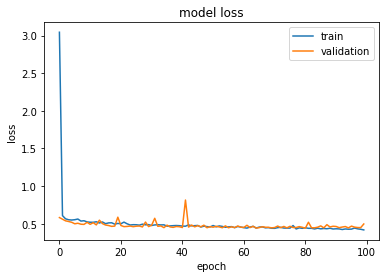

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()